In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [3]:
def build_dataset(words):
    context_len = 4
    X, Y = [], []
    
    for w in words:
        context = [0] * context_len
    
        for l in w + '.':
            ix = stoi[l]
            X.append(context)
            Y.append(ix)
            # print(''.join([itos[i] for i in context]), "->", itos[ix])
            context = context[1:] + [ix]
        
    X, Y = torch.tensor(X), torch.tensor(Y)
    # print(X.shape, Y.shape)
        
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [4]:
C = torch.randn(27, 10)
W1 = torch.randn(40, 300)
b1 = torch.zeros(300)
W2 = torch.randn((300, 27))
b2 = torch.zeros(27)

In [10]:
C = torch.randn(27, 10)
W1 = torch.randn(40, 300) * 0.01
b1 = torch.zeros(300)
W2 = torch.randn((300, 27)) * 0.01
b2 = torch.zeros(27)

In [8]:
C = torch.randn(27, 10)
W1 = torch.randn(40, 300)
torch.nn.init.kaiming_normal_(W1)
b1 = torch.zeros(300)
W2 = torch.randn((300, 27)) * 0.01
torch.nn.init.kaiming_normal_(W2)
b2 = torch.zeros(27)

In [9]:
parameters  = [C, W1, b1, W2, b2]
steps = []
losses = []

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)

20697

In [10]:
# forward pass
ix = torch.randint(0, Xtr.shape[0], (64,))
emb = C[Xtr[ix]]
h = torch.tanh(emb.view(emb.size(0), -1) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr[ix])

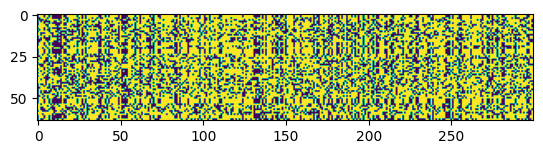

In [7]:
# h with bad initialization: 
# lots of neurons have very high activation values. This means their gradients do not update adequately, 
# as a change in input value leads to very little change in activation.
plt.imshow(h.abs() > 0.99);

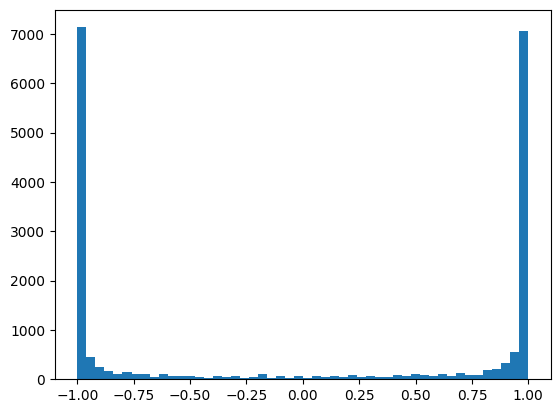

In [8]:
plt.hist(h.view(-1).tolist(), 50);

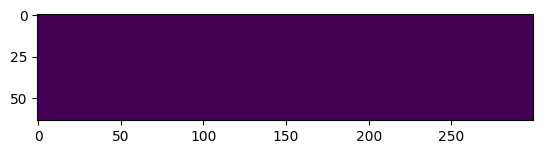

In [13]:
# after getting the initial activations closer to a uniform loss, we see that none of the neurons are over-activated, meaning 
# backprop affects all neurons significantly.
plt.imshow(h.abs() > 0.99);

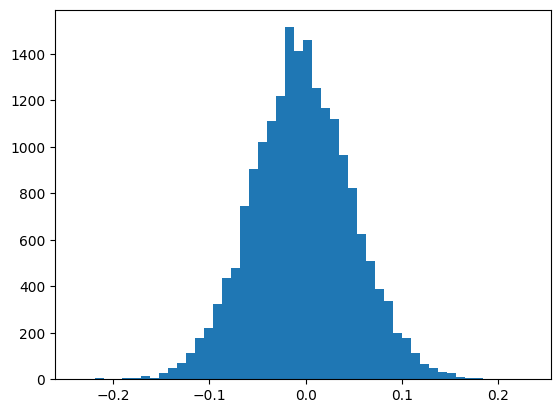

In [14]:
plt.hist(h.view(-1).tolist(), 50);

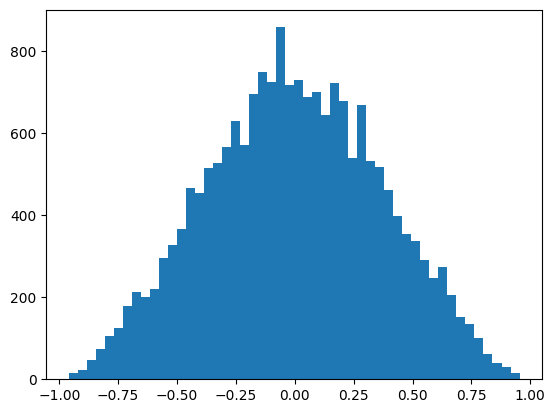

In [11]:
# kaiming initialization:
plt.hist(h.view(-1).tolist(), 50);

In [26]:
def inverse_root_decay(i, lr0=0.1, t0=10000):
    lr = lr0 / ((1 + (i / t0)) ** 0.5)
    return lr

num_iter = 50000
for i in range(num_iter):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.size(0), -1) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = step_decay(i, 20000, 40000)
    # lr = exp_decay(i)
    lr = inverse_root_decay(i, 0.1, 10000)
    for p in parameters:
        p.data += -lr * p.grad

    steps.append(i)
    losses.append(loss.log10().item())

In [15]:
g = torch.Generator().manual_seed(2147483647 + 9)

block_size = 4
for _ in range(10):
    
    out = []
    context = [0] * block_size# initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

kelle.
nyelle.
dowkee.
lelope.
anabiya.
risaiah.
maru.
jericely.
kendria.
yijay.
